In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [20]:
import h5py

train = h5py.File('/mnt/xrootdg/jchishol/mntuples_08_01_22/variables_ttbar_ljets_10j_train.h5','r')
test = h5py.File('/mnt/xrootdg/jchishol/mntuples_08_01_22/variables_ttbar_ljets_10j_test.h5','r')

In [31]:
cut = h5py.File('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16a_6j/variables_ttbar_ljets_16_20metcut_10jets.h5','r')
uncut = uproot.open('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16a_6j/mntuple_ljets_16.root')

cut_array = cut.get('eventNumber').shape[0]
uncut_array = len(uncut['nominal/eventNumber'].array())

print(cut_array)
print(uncut_array)
print(cut_array/uncut_array)

54997
69574
0.7904820766378244


In [2]:
num_events = 0
num_jets = 0
dRs = []
pts = []

for i in range(1,23):
    with uproot.open('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16a_6j/mntuple_ljets_'+str(i)+'.root') as og_file:
        num_events += len(og_file['nominal/eventNumber'].array())
        num_jets += np.sum(og_file['nominal/jet_n'].array())
    match_data = np.array(np.load('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16a_6j/matching_info/mntuple_ljets_'+str(i)+'_jetMatch04.npy'))
    match_dRs = match_data[:,4].astype(float)
    match_pts = match_data[:,5].astype(float)
    dRs += list(match_dRs)
    pts += list(match_pts)
        
        
for i in [1,2,3,6,10,11,13,14,15,16,17,18,37,38,58,60,64,66,68]+list(range(72,83)):
    with uproot.open('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16d_6j/mntuple_ljets_'+str(i)+'.root') as og_file:
        num_events += len(og_file['nominal/eventNumber'].array())
        num_jets += np.sum(og_file['nominal/jet_n'].array())
    match_data = np.array(np.load('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16d_6j/matching_info/mntuple_ljets_'+str(i)+'_jetMatch04.npy'))
    match_dRs = match_data[:,4].astype(float)
    match_pts = match_data[:,5].astype(float)
    dRs += list(match_dRs)
    pts += list(match_pts)
        
for i in list(range(1,7))+list(range(8,23))+list(range(24,31)):
    with uproot.open('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16e_6j/mntuple_ljets_'+str(i)+'.root') as og_file:
        num_events += len(og_file['nominal/eventNumber'].array())
        num_jets += np.sum(og_file['nominal/jet_n'].array())
    match_data = np.array(np.load('/mnt/xrootdg/jchishol/mntuples_08_01_22/mc16e_6j/matching_info/mntuple_ljets_'+str(i)+'_jetMatch04.npy'))
    match_dRs = match_data[:,4].astype(float)
    match_pts = match_data[:,5].astype(float)
    dRs += list(match_dRs)
    pts += list(match_pts)
    
num_matched = len(dRs)

In [32]:
print('Number of events in train:', train['eventNumber'].shape[0])
print('Number of events in test:', test['eventNumber'].shape[0])
print('Number of events in train+test:', train['eventNumber'].shape[0]+test['eventNumber'].shape[0])
print('Percentage train:',train['eventNumber'].shape[0]/(train['eventNumber'].shape[0]+test['eventNumber'].shape[0]))
print('Percentage test:',test['eventNumber'].shape[0]/(train['eventNumber'].shape[0]+test['eventNumber'].shape[0]))
print('Number of events in mc files:',num_events)
print((train['eventNumber'].shape[0]+test['eventNumber'].shape[0])/num_events)

Number of events in train: 20490866
Number of events in test: 3616038
Number of events in train+test: 24106904
Percentage train: 0.8499999004434581
Percentage test: 0.15000009955654198
Number of events in mc files: 30718204
0.7847758286910264


In [23]:
dRs = np.array(dRs)
pts = np.array(pts)


In [24]:
print('For new dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events)
print('Total number of jets: ', num_jets)
print('Number of decay products that were matched: ', num_matched)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched/(4*num_events)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(pts[pts>-1])/num_matched))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(pts[pts>-1])/(4*num_events)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(pts[pts<-1])/(4*num_events)))

For new dR<0.4 matching:
--------------------
Total number of events:  30718204
Total number of jets:  148682105
Number of decay products that were matched:  91179760
Percentage of matches with dR<0.4: 74.206617%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 99.815015%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 74.069346%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 0.137271%



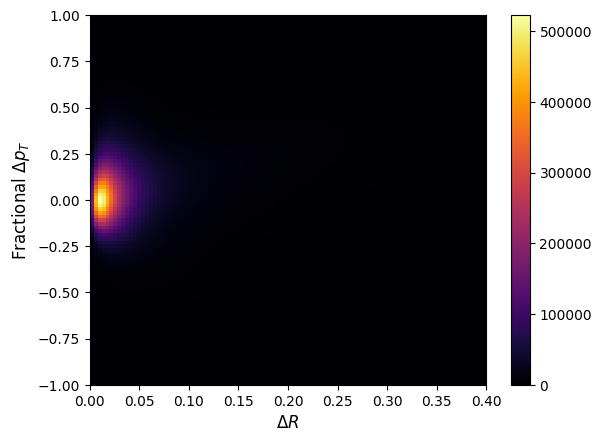

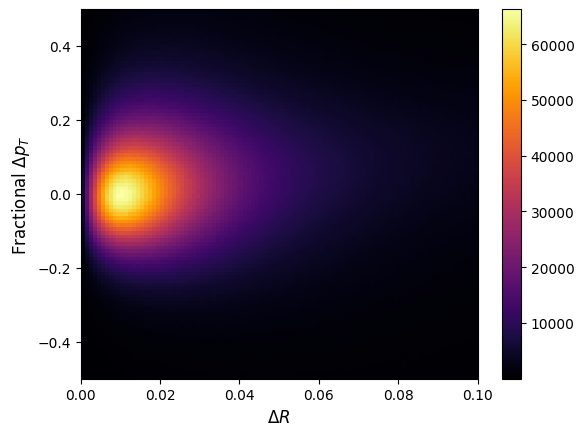

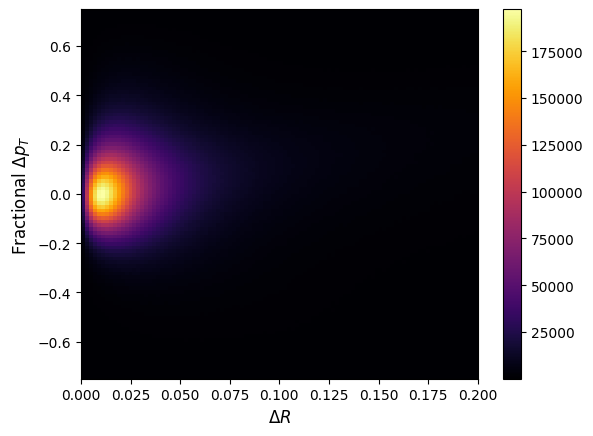

In [12]:
plt.figure('2D-1')
plt.hist2d(dRs,pts,bins=(100,100),range=((0,0.4),(-1,1)),cmap='inferno')
plt.xlabel('$\Delta R$',fontsize=12)
plt.ylabel('Fractional $\Delta p_T$',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar()

plt.figure('2D-2')
plt.hist2d(dRs,pts,bins=(100,100),range=((0,0.1),(-0.5,0.5)),cmap='inferno')
plt.xlabel('$\Delta R$',fontsize=12)
plt.ylabel('Fractional $\Delta p_T$',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar()

plt.figure('2D-3')
plt.hist2d(dRs,pts,bins=(100,100),range=((0,0.2),(-0.75,0.75)),cmap='inferno')
plt.xlabel('$\Delta R$',fontsize=12)
plt.ylabel('Fractional $\Delta p_T$',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar()